# Anomaly Detection

## Install packages

In [66]:
! pip install pandas matplotlib seaborn ace_tools statsmodels scikit-learn imblearn xgboost

## Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

## Data Reading and processing

In [2]:
df = pd.read_csv('burke-gilman-trail-north-of-ne-70th-st-bike-and-ped-counter (4).csv')
df

,Date,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South
0,2014-01-01T00:00:00.000,15.0,0.0,2.0,2.0,11.0
1,2014-01-01T01:00:00.000,9.0,1.0,0.0,1.0,7.0
2,2014-01-01T02:00:00.000,9.0,0.0,0.0,0.0,9.0
3,2014-01-01T03:00:00.000,19.0,0.0,0.0,0.0,19.0
4,2014-01-01T04:00:00.000,19.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...
52579,2019-12-31T19:00:00.000,6.0,2.0,1.0,1.0,2.0
52580,2019-12-31T20:00:00.000,2.0,0.0,0.0,0.0,2.0
52581,2019-12-31T21:00:00.000,3.0,1.0,2.0,0.0,0.0
52582,2019-12-31T22:00:00.000,1.0,0.0,0.0,0.0,1.0


<span style="color:green"> BGT North of NE 70th Total = Total number of pedestrians + bikers recorded at a location on the Burke-Gilman Trail (North of NE 70th Street) during that hour</span>  
<span style="color:green"> Ped North = Number of pedestrians going northbound during that hour</span>  
<span style="color:green"> Bike North = Number of bikes going northbound during that hour</span>  
<span style="color:green"> Ped South = Number of pedestrians going southbound during that hour</span>  
<span style="color:green"> Bike South = Number of bikes going southbound during that hour</span>


### Converting TimeStamp To Date-Time

In [3]:
df['anamoly'] = (df['BGT North of NE 70th Total'] >= 500).astype(int)

In [4]:
df['anamoly']

0        0
1        0
2        0
3        0
4        0
        ..
52579    0
52580    0
52581    0
52582    0
52583    0
Name: anamoly, Length: 52584, dtype: int64

In [ ]:
# print(df["anamoly"].value_counts())

# df[df['BGT North of NE 70th Total'] >= 500] 


,Date,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South
3274,2014-05-17T10:00:00.000,547.0,54.0,36.0,111.0,346.0
3275,2014-05-17T11:00:00.000,823.0,57.0,31.0,213.0,522.0
3276,2014-05-17T12:00:00.000,710.0,31.0,35.0,483.0,161.0
3780,2014-06-07T12:00:00.000,530.0,97.0,112.0,161.0,160.0
3781,2014-06-07T13:00:00.000,677.0,147.0,186.0,168.0,176.0
...,...,...,...,...,...,...
42945,2018-11-25T09:00:00.000,1278.0,658.0,603.0,8.0,9.0
49446,2019-08-23T06:00:00.000,1085.0,38.0,8.0,78.0,961.0
49447,2019-08-23T07:00:00.000,756.0,29.0,13.0,63.0,651.0
51848,2019-12-01T08:00:00.000,1764.0,1324.0,428.0,9.0,3.0


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load your data (assuming it's already in a pandas DataFrame named `df`)
# # Example: df = pd.read_csv('your_data.csv')

# # Step 1: Convert the 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Step 2: Filter anomalous traffic (where BGT North of NE 70th Total >= 500)
# anomalous_df = df[df['BGT North of NE 70th Total'] >= 500]

# # Step 3: Extract time-related features for analysis
# anomalous_df['Hour'] = anomalous_df['Date'].dt.hour
# anomalous_df['DayOfWeek'] = anomalous_df['Date'].dt.dayofweek  # Monday=0, Sunday=6
# anomalous_df['Month'] = anomalous_df['Date'].dt.month
# anomalous_df['Year'] = anomalous_df['Date'].dt.year

# # Step 4: Activity analysis
# # Plot the total anomalous traffic over time (by hour of the day)
# plt.figure(figsize=(10, 6))
# anomalous_df.groupby('Hour')['BGT North of NE 70th Total'].sum().plot(kind='bar', color='skyblue')
# plt.title('Anomalous Traffic by Hour of Day')
# plt.xlabel('Hour of Day')
# plt.ylabel('Total Traffic')
# plt.xticks(rotation=45)
# plt.show()

# # Step 5: Activity analysis by day of the week
# plt.figure(figsize=(10, 6))
# anomalous_df.groupby('DayOfWeek')['BGT North of NE 70th Total'].sum().plot(kind='bar', color='lightgreen')
# plt.title('Anomalous Traffic by Day of Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Total Traffic')
# plt.xticks(rotation=45, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
# plt.show()

# # Step 6: Activity analysis by month
# plt.figure(figsize=(10, 6))
# anomalous_df.groupby('Month')['BGT North of NE 70th Total'].sum().plot(kind='bar', color='coral')
# plt.title('Anomalous Traffic by Month')
# plt.xlabel('Month')
# plt.ylabel('Total Traffic')
# plt.xticks(rotation=45, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.show()

# # Step 7: Identify peaks or patterns
# # You can further break it down by comparing Pedestrian and Bike traffic if needed
# plt.figure(figsize=(10, 6))
# anomalous_df.groupby('Hour')[['Ped South', 'Ped North', 'Bike North', 'Bike South']].sum().plot(kind='line')
# plt.title('Pedestrian and Bike Traffic Patterns by Hour of Day')
# plt.xlabel('Hour of Day')
# plt.ylabel('Traffic Count')
# plt.legend(title='Traffic Type')
# plt.show()


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

### Checking null values in columns

In [7]:
df.isnull().values.any()
df[df.isnull().values.any(axis=1)]
# df[df.isnull().values.sum()]

,Date,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South,anamoly
5337,2014-08-11 09:00:00,NaN,NaN,NaN,NaN,NaN,0
6586,2014-10-02 10:00:00,NaN,NaN,NaN,NaN,NaN,0
9563,2015-02-03 11:00:00,NaN,NaN,NaN,NaN,NaN,0
10346,2015-03-08 02:00:00,NaN,NaN,NaN,NaN,NaN,0
19250,2016-03-13 02:00:00,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
41020,2018-09-06 04:00:00,NaN,NaN,NaN,NaN,NaN,0
41021,2018-09-06 05:00:00,NaN,NaN,NaN,NaN,NaN,0
41022,2018-09-06 06:00:00,NaN,NaN,NaN,NaN,NaN,0
41023,2018-09-06 07:00:00,NaN,NaN,NaN,NaN,NaN,0


In [8]:
columns = ['BGT North of NE 70th Total',	'Ped South',	'Ped North',	'Bike North',	'Bike South']

df[columns] = df[columns].astype(float)
# df = df.astype(float)

### Determining whether data is normally distributed, skewed

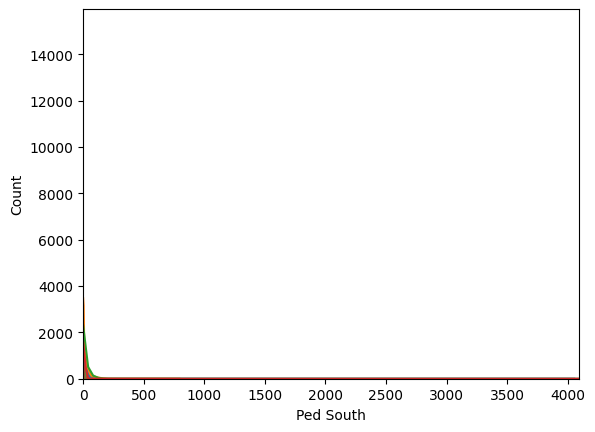

In [9]:

import numpy as np

# Checking for normality using histogram
sns.histplot(df['Ped South'], kde= True)
sns.histplot(df['Bike North'], kde= True)
sns.histplot(df['Bike South'], kde= True)
sns.histplot(df['Ped North'], kde= True)
plt.xlim(0, df["Ped North"].max())  # Use the actual max value instead of 1000
plt.ylim(0, df["Ped North"].value_counts().max())  # Set y-limit based on data distribution
plt.show()


We can observe that data is right skewed so we will be applying the log transformation to avoid the high skewness and median for the null values

In [10]:
#Filling the na values with median since the data are skewed 
columns_to_fill = ['Ped South','Bike North','Bike South','Ped North']
total = 'BGT North of NE 70th Total'
df[columns_to_fill] = df[columns_to_fill].apply(lambda x:x.fillna(x.median()))

df[total] = df[columns_to_fill].sum(axis=1)

# Apply log transformation to avoid high skewness
df["Ped South"] = np.log1p(df["Ped South"])
df["Ped North"] = np.log1p(df["Ped North"])
df["Bike South"] = np.log1p(df["Bike South"])
df["Bike North"] = np.log1p(df["Bike North"])
df["BGT North of NE 70th Total"] = np.log1p(df["BGT North of NE 70th Total"])

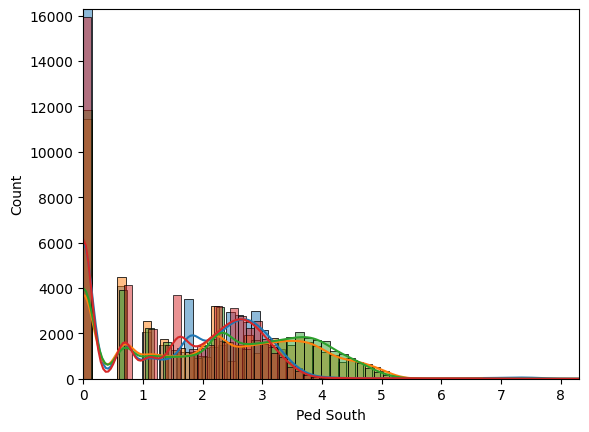

In [11]:


# Checking for normality using histogram
sns.histplot(df['Ped South'], kde= True)
sns.histplot(df['Bike North'], kde= True)
sns.histplot(df['Bike South'], kde= True)
sns.histplot(df['Ped North'], kde= True)
plt.xlim(0, df["Ped South"].max())  # Use the actual max value instead of 1000
plt.ylim(0, df["Ped South"].value_counts().max())  # Set y-limit based on data distribution
plt.show()


### Adding lag features and setting target columns

### Lag features are used in time series analysis or machine learning to represent past values of a variable.
##### Let us suppose a dataset having features Day and Sales
| Day | Sales |
|-----|-------|
| 1   | 100   |
| 2   | 120   |
| 3   | 130   |
| 4   | 110   |

##### Now if we apply lag freature to analyse the past 1 day values then we will using lag 1 feature which will shift our values to past 1 and the above dataset looks like this
| Day | Sales | Sales_lag1 |
|-----|-------|------------|
| 1   | 100   | NaN        |
| 2   | 120   | 100        |
| 3   | 130   | 120        |
| 4   | 110   | 130        |

##### So here if we have to analyse the future data in the present then we will use lag -3 which ill shift our values to future 3 for example in day 1 it will take the value of day 3 and in day 2 it will take the value of day 4 the value of the first dataset looks like this if we apply this feature
| Day | Sales | Sales_lag1 |
|-----|-------|------------|
| 1   | 100   | NaN        |
| 2   | 120   | 100        |
| 3   | 130   | 120        |
| 4   | 110   | 130        |





In [12]:
log_threshold = np.log1p(500) 

In [13]:
df.isnull().values.any()
df = df.sort_values('Date')
df['anamoly'] = (df['BGT North of NE 70th Total'] >= log_threshold).astype(int)
df['lag_1hr'] = df['BGT North of NE 70th Total'].shift(1)
df['lag_2hr'] = df['BGT North of NE 70th Total'].shift(2)
df['lag_3hr'] = df['BGT North of NE 70th Total'].shift(3)
# df['lag_(neg)3hr'] = df['BGT North of NE 70th Total'].shift(-3)

# negative lag feature .....
df['target_3hr'] = (df['BGT North of NE 70th Total'].shift(-3) >= log_threshold).astype(int)

df.dropna(inplace=True)

df


,Date,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South,anamoly,lag_1hr,lag_2hr,lag_3hr,target_3hr
3,2014-01-01 03:00:00,2.995732,0.000000,0.000000,0.000000,2.995732,0,2.302585,2.302585,2.772589,0
4,2014-01-01 04:00:00,2.995732,0.000000,0.000000,0.000000,2.995732,0,2.995732,2.302585,2.302585,0
5,2014-01-01 05:00:00,2.708050,0.000000,0.000000,0.000000,2.708050,0,2.995732,2.995732,2.302585,0
6,2014-01-01 06:00:00,2.397895,0.000000,0.693147,0.693147,2.197225,0,2.708050,2.995732,2.995732,0
7,2014-01-01 07:00:00,2.397895,1.098612,1.386294,1.609438,0.693147,0,2.397895,2.708050,2.995732,0
...,...,...,...,...,...,...,...,...,...,...,...
52579,2019-12-31 19:00:00,1.945910,1.098612,0.693147,0.693147,1.098612,0,2.708050,2.708050,3.713572,0
52580,2019-12-31 20:00:00,1.098612,0.000000,0.000000,0.000000,1.098612,0,1.945910,2.708050,2.708050,0
52581,2019-12-31 21:00:00,1.386294,0.693147,1.098612,0.000000,0.000000,0,1.098612,1.945910,2.708050,0
52582,2019-12-31 22:00:00,0.693147,0.000000,0.000000,0.000000,0.693147,0,1.386294,1.098612,1.945910,0


In [14]:
print(df["anamoly"].value_counts())

anamoly
0    52085
1      496
Name: count, dtype: int64


In [15]:
#Filling the na values with median since the data are skewed 
columns_to_fill = ['lag_1hr','lag_2hr','lag_3hr']
df[columns_to_fill] = df[columns_to_fill].apply(lambda x:x.fillna(x.median()))

In [77]:
# df_normalized = df.copy()
# columns_to_normalize = ['Ped South','Bike North','Bike South','Ped North','BGT North of NE 70th Total']
# df_normalized[columns_to_normalize] = df[columns_to_normalize].apply(lambda x:(x-x.min())/(x.max()-x.min()))


In [78]:
# df_normalized

## Prepare Time-Based Data 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27564\1335719024.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_traffic.index, y=weekly_traffic.values, palette="Blues")


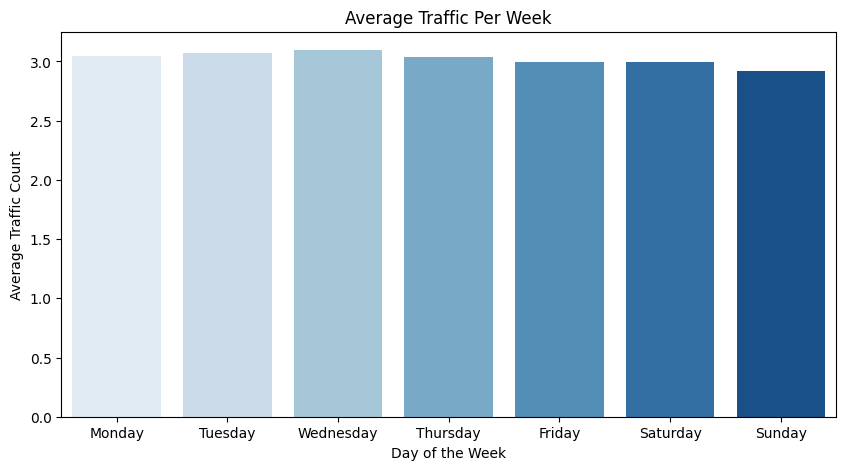

In [16]:
df['Weekdays'] = df['Date'].dt.dayofweek
df['Weekday Name'] = df['Date'].dt.day_name()
df['Day hours'] = df['Date'].dt.hour

# Group by weekday and compute the mean
weekly_traffic = df.groupby('Weekday Name')['BGT North of NE 70th Total'].mean()

# Reorder to show Monday-Sunday in order
weekly_traffic = weekly_traffic.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_traffic.index, y=weekly_traffic.values, palette="Blues")
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic Count")
plt.title("Average Traffic Per Week")
plt.show()

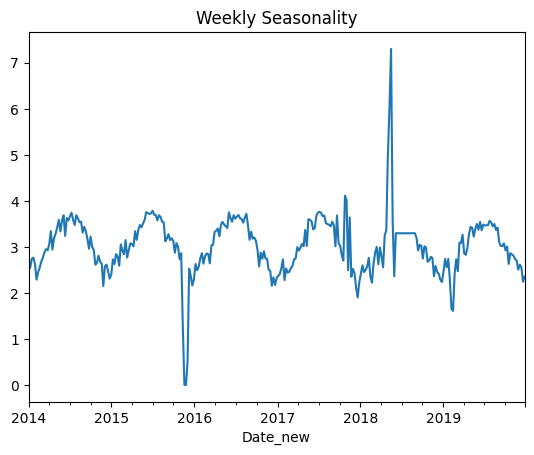

In [17]:
df['Date_new'] = pd.to_datetime(df['Date']) 
df.set_index('Date_new', inplace = True)

df["BGT North of NE 70th Total"].resample("7D").mean().plot(title="Weekly Seasonality")
plt.show()

### y axis total weekly season analysis



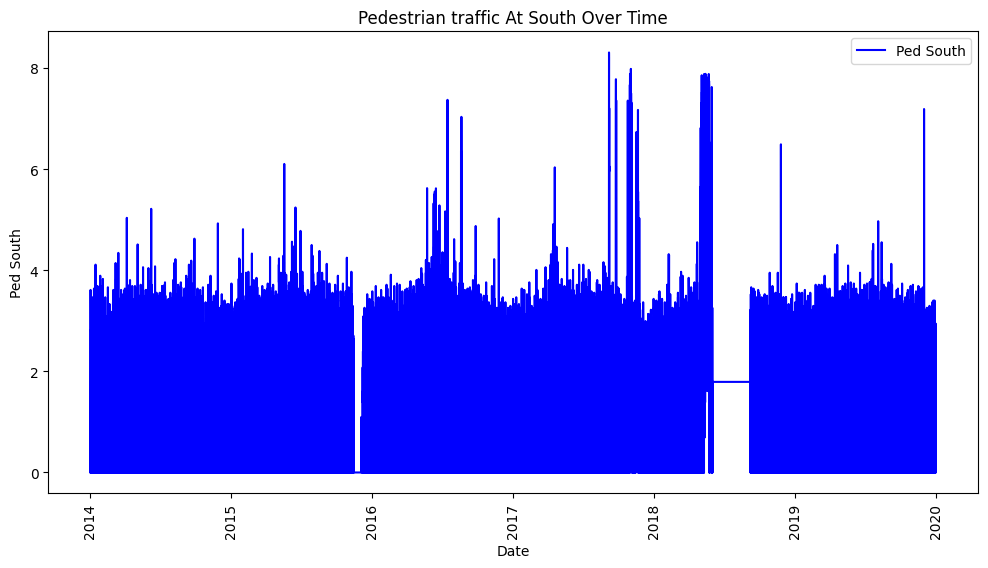

In [17]:

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ped South'],label = 'Ped South', color = 'Blue')
plt.title('Pedestrian traffic At South Over Time')
plt.xlabel('Date')
plt.ylabel('Ped South')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## Applying Rolling Index

#### A rolling index (or rolling window) is a technique used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.
#### For example, a 30-day rolling average calculates the average of the last 30 days at each point in time. It's like a moving lens that looks back over a window and computes a metric (like the mean).

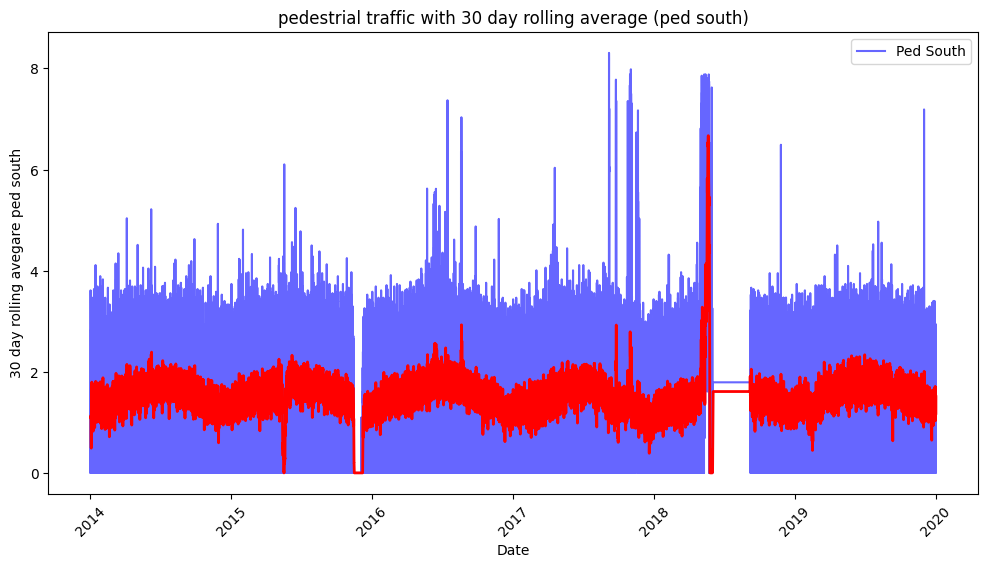

In [18]:
df['Ped South Rolling Average'] = df['Ped South'].rolling(window = 30).mean()
df['Bike South Rolling Average'] = df['Bike South'].rolling(window = 30).mean()
df['Ped North Rolling Average'] = df['Ped North'].rolling(window = 30).mean()
df['Bike North Rolling Average'] = df['Bike North'].rolling(window = 30).mean()
plt.figure(figsize= (12,6))
plt.plot(df.index, df['Ped South'], label = 'Ped South', color = 'Blue',alpha = 0.6)
plt.plot(df.index, df['Ped North Rolling Average'], color = 'red',linewidth= 2)
plt.title('pedestrial traffic with 30 day rolling average (ped south)')
plt.xlabel('Date')
plt.ylabel('30 day rolling avegare ped south')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

# Extracting Time Features

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, average_precision_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

df = df.drop('Weekday Name',axis = 'columns')

# Step 1: Drop target and extract features
X = df.drop("target_3hr", axis=1)
y = df["target_3hr"]

# Step 2: Process datetime columns (drop or extract features)
if 'Date' in X.columns or 'timestamp' in X.columns:
    datetime_col = 'Date' if 'Date' in X.columns else 'timestamp'
    X[datetime_col] = pd.to_datetime(X[datetime_col])
    X["hour"] = X[datetime_col].dt.hour
    X["dayofweek"] = X[datetime_col].dt.dayofweek
    X.drop(columns=[datetime_col], inplace=True)

# Step 3: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

# Step 5: Balance dataset with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, Y_train)

# Step 6: Train the Random Forest model
model = RandomForestClassifier(class_weight='balanced',n_estimators=100,random_state= 42)

# # Step 6: Calculate correct scale_pos_weight
# scale_pos_weight = (Y_train == 0).sum() / (Y_train == 1).sum()

# # Step 7: Train the XGBoost model
# model = XGBClassifier(
#     scale_pos_weight=scale_pos_weight,
#     use_label_encoder=False,
#     eval_metric="logloss",
#     random_state=42
# )
# model.fit(X_resampled, y_resampled)

# Step 8: Predict and evaluate with threshold tuning
y_probs = model.predict_proba(X_test_imputed)[:, 1]
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

accuracy = accuracy_score(Y_test, y_pred_adjusted)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(Y_test, y_pred_adjusted))

# Step 9: Correct PR AUC calculation
pr_auc = average_precision_score(Y_test, y_probs)  # Use probabilities
print(f"PR AUC: {pr_auc:.2f}")



## Recall Precision Curve

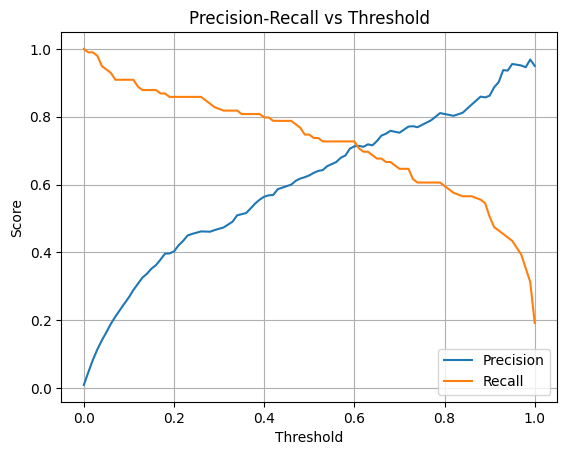

In [50]:
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(Y_test, y_probs)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


## Feature Importance

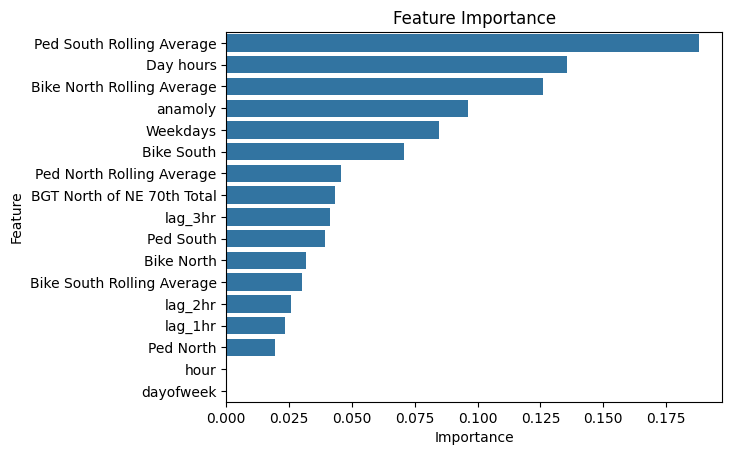

In [55]:

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

## Confusion Matrix

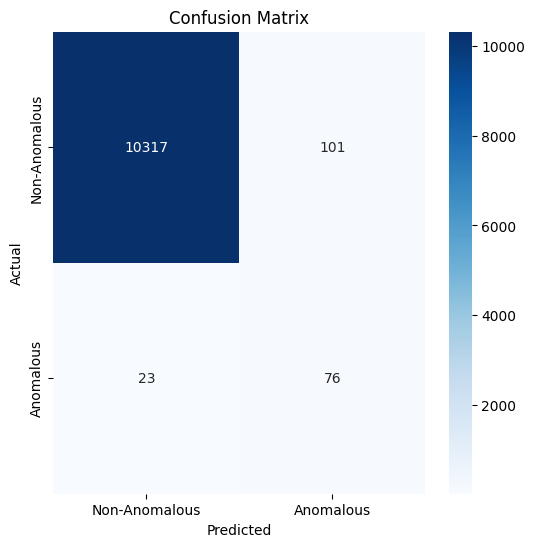

In [56]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_adjusted)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Anomalous', 'Anomalous'], yticklabels=['Non-Anomalous', 'Anomalous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Save the model for inference

In [ ]:
import joblib
joblib.dump(model,"random_forest.pkl")